# K-Means Clustering - Unsupervised Learning


In [286]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans

%matplotlib inline

In [287]:
df = pd.read_csv('seattle_weather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [288]:
df.info() # there is null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [289]:
# Replace null values with False

def RAIN_INSERTION(cols):
    RAIN=cols[0]
    if pd.isnull(RAIN):
        return False
    else:
        return RAIN

In [290]:
# Replace null values with the mean

def PRCP_INSERTION(col):
    PRCP=col[0]
    if pd.isnull(PRCP):
        return df['PRCP'].mean()
    else:
        return PRCP

In [291]:
df['PRCP']=df[['PRCP']].apply(PRCP_INSERTION,axis=1)
df['RAIN']=df[['RAIN']].apply(RAIN_INSERTION,axis=1)

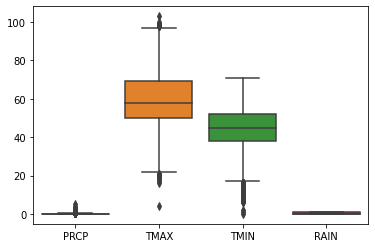

In [292]:
sns.boxplot(data=df)

In [293]:
df.describe()

,PRCP,TMAX,TMIN
count,25551.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239017,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [294]:
#Dropping the outliers from TMIN column
df=df.drop(df[df['TMIN']<17 ].index)

#Dropping the outliers from TMAX columns i.e. the value more than 100
df=df.drop(df[(df['TMAX']>97.5) | (df['TMAX']< 21.5)].index)

#Dropping the outliers from PRCP columns i.e. the value more than 0.275
df=df.drop(df[(df['PRCP']>0.25) | (df['PRCP']< -0.15) ].index)


In [295]:
# Drop date feature 
df.drop(['DATE'], axis = 1 ,inplace=True)

In [296]:
df.head()

,PRCP,TMAX,TMIN,RAIN
4,0.17,45,32,True
7,0.04,48,35,True
8,0.12,50,31,True
10,0.01,42,32,True
11,0.00,41,26,False


In [297]:
# Convert Rain feature to numeric
df['RAIN'].replace({True: 1 , False: 0}, inplace =True)


In [298]:
df.shape

(21893, 4)

## Determine K value
option 1: ny visualistion
    

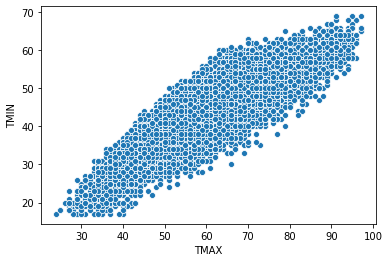

In [299]:
sns.scatterplot(df.TMAX , df.TMIN)

Optional 2: by elbow technique

In [300]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['TMAX' , 'TMIN']])
    sse.append(km.inertia_)

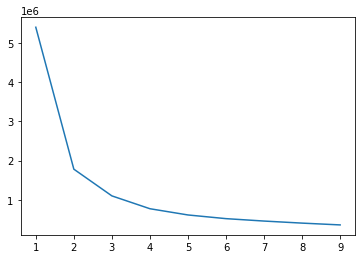

In [301]:
sns.lineplot(k_rng, sse , data = df)

In [302]:
km = KMeans(n_clusters = 2)
y_predicated = km.fit_predict(df[['TMAX' , 'TMIN']])
y_predicated

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [303]:
df['cluster'] = y_predicated

df.sample(10)

,PRCP,TMAX,TMIN,RAIN,cluster
11391,0.00,68,38,0,1
8368,0.05,38,28,1,0
13531,0.00,51,37,0,0
13681,0.00,71,48,0,1
20545,0.00,53,39,0,0
5697,0.00,79,56,0,1
4448,0.05,51,37,1,0
5559,0.00,53,42,0,0
7548,0.00,79,57,0,1
14410,0.01,65,48,1,1


In [304]:
km.cluster_centers_

array([[50.22024883, 37.82527948],
       [71.61697991, 52.11906305]])

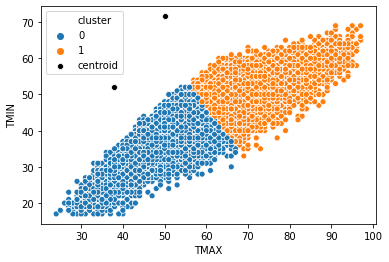

In [305]:


sns.scatterplot(x = 'TMAX' , y= 'TMIN' ,
                hue = 'cluster' , data = df)


sns.scatterplot(km.cluster_centers_[0], 
                km.cluster_centers_[1], 
                markers= '*', label = 'centroid',
               color = 'black')

